In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import mrcnn libraries
#sys.path.append("/home/redne/repos/Mask_RCNN/") 
sys.path.append("../") 
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [10]:
from model_config.zerowaste_config import ZeroWaste_maskrcnn_config
config = ZeroWaste_maskrcnn_config()

class InferenceConfig(ZeroWaste_maskrcnn_config):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    #DETECTION_MIN_CONFIDENCE = 0.75
    DETECTION_MIN_CONFIDENCE = 0.5
    
inference_config = InferenceConfig()

#config.display()

In [11]:
# Recreate the model in inference mode
MODEL_DIR = '/mnt/omreast_users/phhale/zerowaste/03-experiments/ds2/maskrcnn/logs/'

model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)
                          #model_dir=MODEL_DIR)
    
# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")

model_path = model.find_last()
#model_path = '/home/redne/ZeroWaste3D/research/CleanOcean/models/test_exp/logs/cig_butts20201018T1443/mask_rcnn_cig_butts_0008.h5'

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /mnt/omreast_users/phhale/zerowaste/03-experiments/ds2/maskrcnn/logs/waterwaste_ds020201019T2200/mask_rcnn_waterwaste_ds0_0005.h5
Re-starting from epoch 5


Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


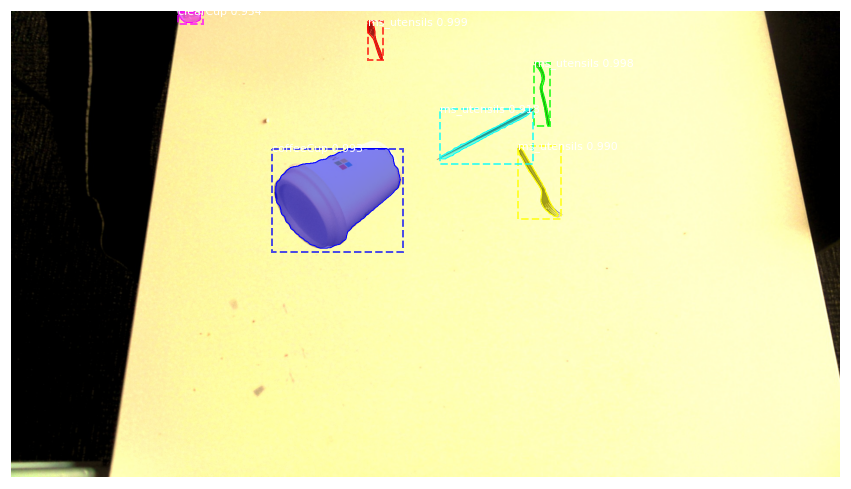

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


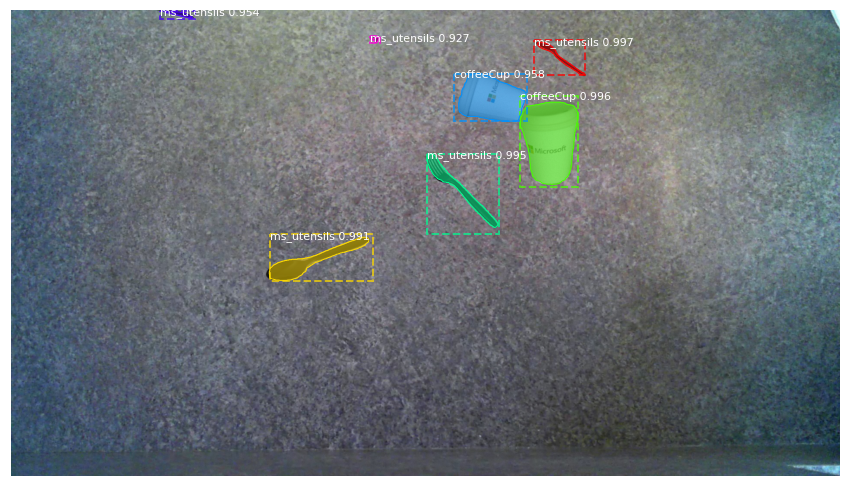

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


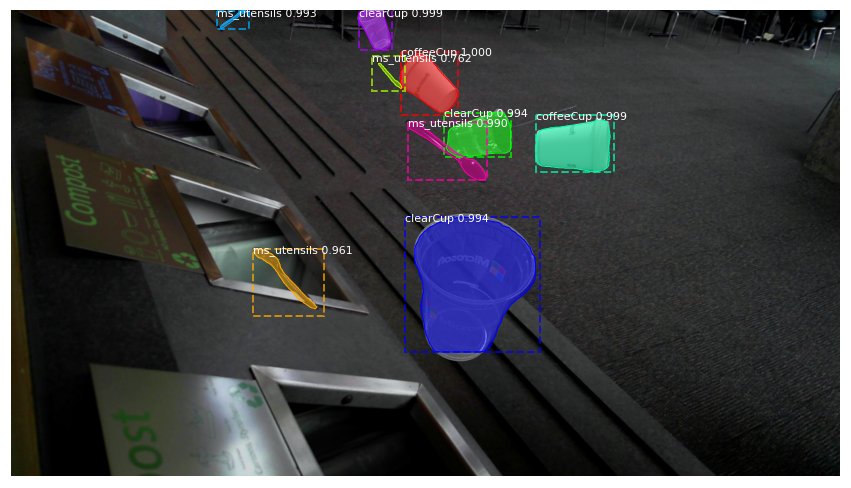

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


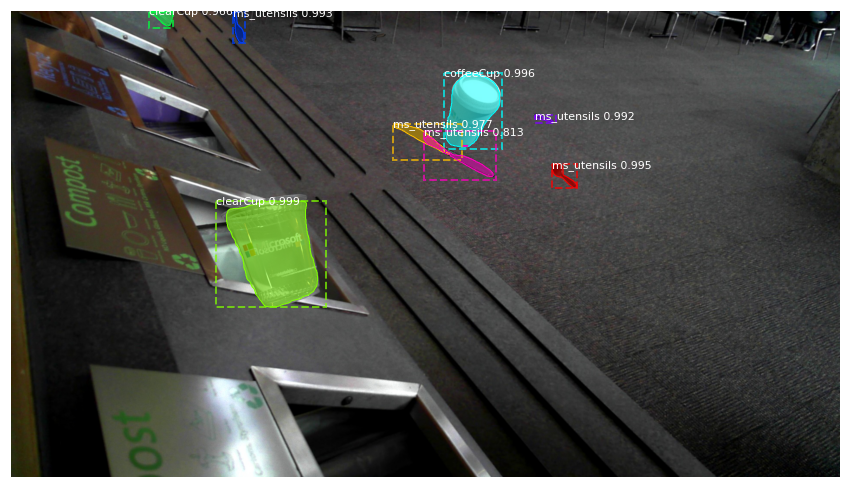

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


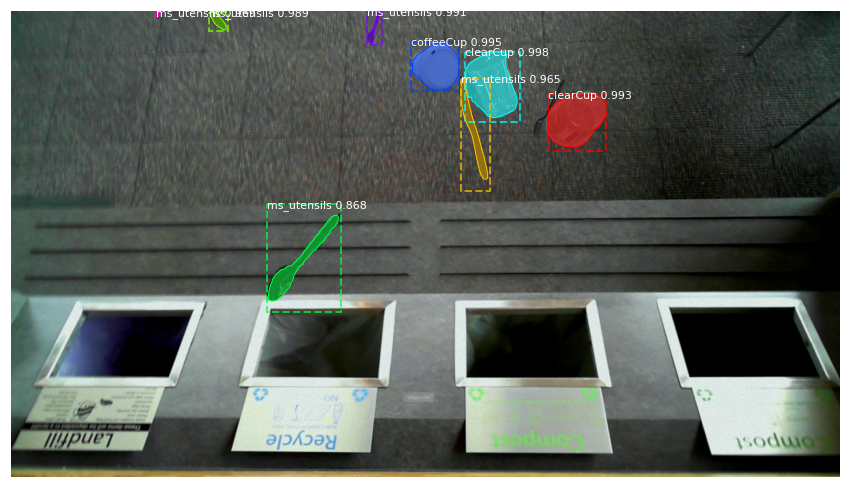

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


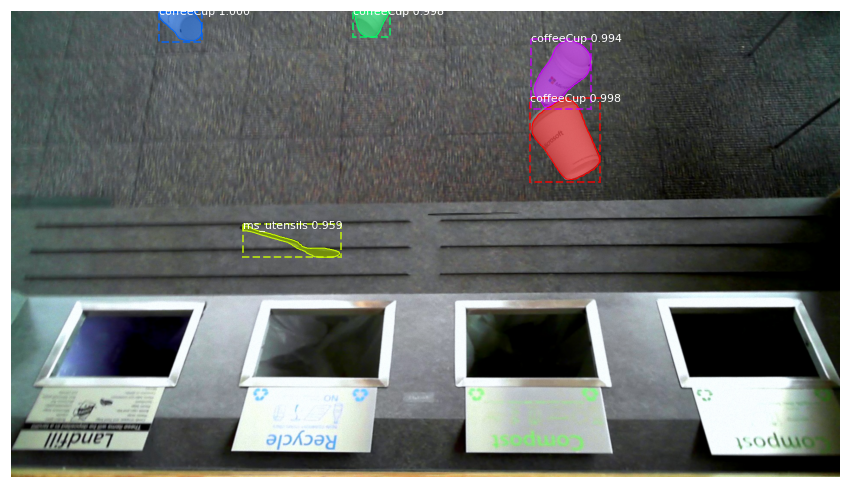

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


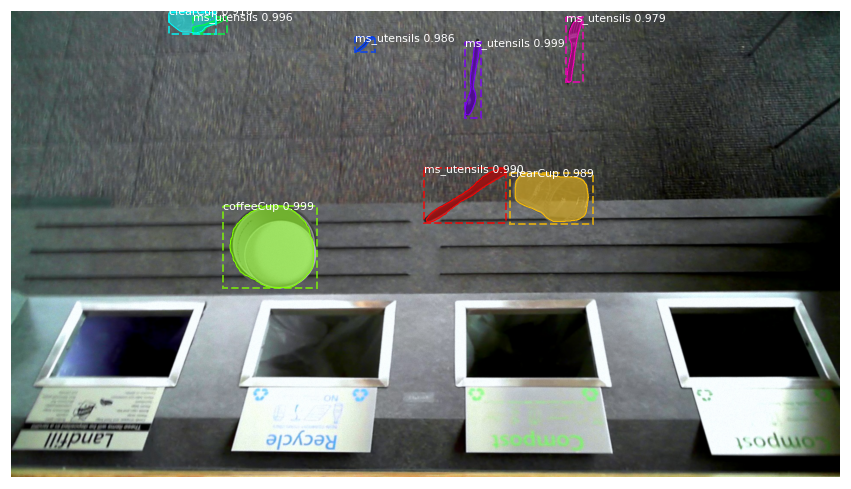

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


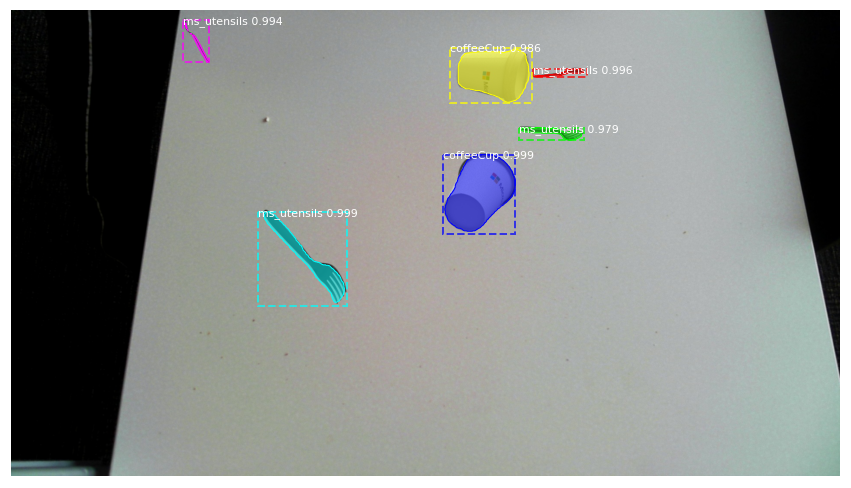

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  103.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


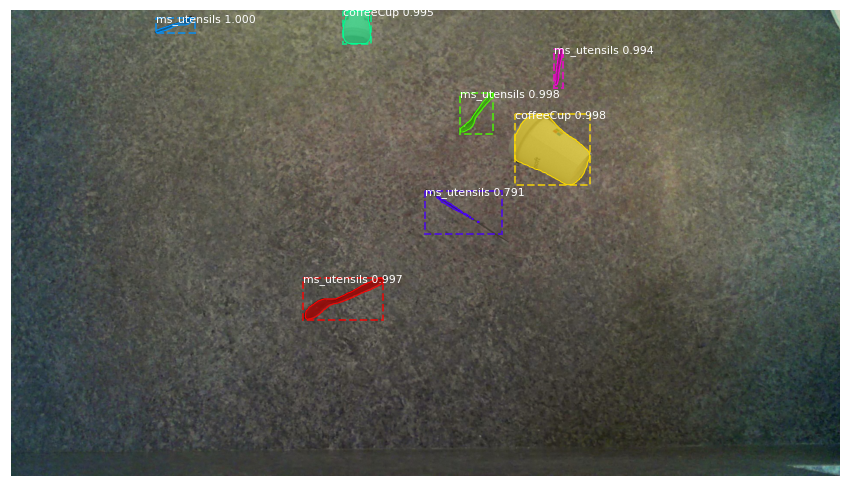

In [7]:
import skimage

#import glob

# Create the frames
gif_frames = []

real_test_dir = '/mnt/omreast_users/phhale/zerowaste/02-datasets/ds2/images'

class_names = ['BG', 'clearCup', 'coffeeCup', 'ms_utensils']

image_paths = []
#for filename in os.listdir(real_test_dir):
#    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
test_images = ['000193.jpg', '000085.jpg', '000271.jpg', '000245.jpg', '000217.jpg', '000396.jpg', '000015.jpg', '000383.jpg',
'000060.jpg']

for filename in test_images:
    image_paths.append(os.path.join(real_test_dir, filename))

for image_path in image_paths:
    img = skimage.io.imread(image_path)
    img_arr = np.array(img)
    results = model.detect([img_arr], verbose=1)
    r = results[0]
    save_vis_path = 'outputs/'+'test_'+os.path.basename(image_path)
    visualize.display_instances1(img, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'], figsize=(15,10),
                                save_vis = save_vis_path)
    gif_frames.append(save_vis_path)

In [8]:
from PIL import Image
# Open all the frames
gif_images = []

for n in gif_frames:
    frame = Image.open(n)
    gif_images.append(frame)

# Save the frames as an animated GIF
gif_images[0].save('outputs/zerowaste_ds2_maskrcnn_valoutputs.gif',
               save_all=True,
               append_images=gif_images[1:],
               duration=500,
               loop=10)